### Table of Experiments

#### exp1
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  No Additional supressional activity at 1000ms for 50ms

#### exp2
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  Additional supressional activity at 1000ms for 50ms

In [1]:
# To get the lastest pickle files run
! cat pullresults.sh

#!/bin/bash

rsync -auv hameed@login.inm.kfa-juelich.de:/users/hameed/simulenation/src/demyelination/data/ /home/hunaid/simulenation/src/demyelination/data/



In [1]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

In [3]:
sys.path.append("demyelination/") # we need this to successfully read pickle files

In [4]:
import fna

In [22]:
import pipeline as pipeline

In [11]:
def preparedf (dataobjs):
    # input dataframe
    # output organized data
    if len(dataobjs) == 0:
        raise Exception("No activity files found.")

    parts = dataobjs[0].spikeobj.keys()

    df = pd.DataFrame()

    for part in parts:
        for data in dataobjs:
            data.spikeobj[part].time_offset(250)
            tmp = data.params
            tmp = tmp.update({
                "brainPart" : part,
                "meanSpkRate" : data.spikeobj[part].mean_rate(),
                "pearsonCoeff" : data.metrics['pearsoncoeff'][part],
                "cvIsi" : data.spikeobj[part].cv_isi().mean()
            })
            df = df.append(data.params, ignore_index=True)

    #sortingParams = ["gamma", "nux"]
    #df = df.sort_values(by=sortingParams)

    return df

In [28]:

def makesubplot (data, fig, ax, attr):
    for axis, part in zip([0, 1], ["MGN", "TRN"]):
        d = data[ data["brainPart"] == part ].pivot_table(attr, "exp3_nuX", "gamma")

        p = ax[axis].imshow(d, interpolation="nearest")
        fig.colorbar(p, ax=ax[axis])

        ax[axis].set_title(attr + " " + part)

        ax[axis].set_yticklabels(d.index.values)
        ax[axis].set_xticklabels(d.columns.values)

        ax[axis].set_ylabel("nuX")
        ax[axis].set_xlabel("gamma")


## Exp1

In [45]:
files2 = pipeline.readfiles("demyelination/data/exp2/activity");
df2 = preparedf(files2);

In [47]:
df2[(df2.exp2_nuX == 12) & (df2.gamma == 4) & (df2.nTRN == 500)]

exp2_nuX  gamma   nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
81       12.0    4.0  500.0       MGN     8.211783      0.005256  0.644393
225      12.0    4.0  500.0       TRN    17.206266      0.782844  1.190964

In [44]:
df2[(df2.exp1_nuX == 12) & (df2.gamma == 4) & (df2.nTRN == 500)]

exp1_nuX  gamma   nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
116      12.0    4.0  500.0       MGN     8.062087     -0.000876  0.626813
260      12.0    4.0  500.0       TRN    11.824502      0.006766  0.623445

In [78]:
files = pipeline.readfiles("demyelination/data/exp3/activity");

In [98]:
#dir(files[0].spikeobj['TRN'])
#dir(files[0].spikeobj['TRN'].spiketrains[1001.0])
for fl in files:
    spktrn = fl.spikeobj['TRN'].spiketrains[1001.0].spike_times
    if not(True in (spktrn < 1025) & (spktrn > 1000)):
        print(fl.params)

{'exp3_nuX': 8.0, 'gamma': 10.0, 'wMGN': 1.5, 'nuX_stim': 40.0}
{'exp3_nuX': 9.0, 'gamma': 7.0, 'wMGN': 2.5, 'nuX_stim': 40.0}
{'exp3_nuX': 11.0, 'gamma': 10.0, 'wMGN': 3.0, 'nuX_stim': 20.0}
{'exp3_nuX': 8.0, 'gamma': 6.0, 'wMGN': 1.5, 'nuX_stim': 25.0}
{'exp3_nuX': 13.0, 'gamma': 9.0, 'wMGN': 2.0, 'nuX_stim': 45.0}
{'exp3_nuX': 14.0, 'gamma': 6.0, 'wMGN': 3.0, 'nuX_stim': 35.0}
{'exp3_nuX': 15.0, 'gamma': 2.0, 'wMGN': 1.5, 'nuX_stim': 10.0}
{'exp3_nuX': 11.0, 'gamma': 4.0, 'wMGN': 1.0, 'nuX_stim': 20.0}
{'exp3_nuX': 12.0, 'gamma': 9.0, 'wMGN': 2.0, 'nuX_stim': 40.0}
{'exp3_nuX': 14.0, 'gamma': 7.0, 'wMGN': 1.0, 'nuX_stim': 30.0}
{'exp3_nuX': 9.0, 'gamma': 2.0, 'wMGN': 2.5, 'nuX_stim': 35.0}
{'exp3_nuX': 10.0, 'gamma': 7.0, 'wMGN': 3.0, 'nuX_stim': 10.0}
{'exp3_nuX': 9.0, 'gamma': 4.0, 'wMGN': 2.0, 'nuX_stim': 15.0}
{'exp3_nuX': 12.0, 'gamma': 10.0, 'wMGN': 1.0, 'nuX_stim': 35.0}
{'exp3_nuX': 8.0, 'gamma': 6.0, 'wMGN': 2.5, 'nuX_stim': 5.0}
{'exp3_nuX': 9.0, 'gamma': 10.0, 'wMGN': 3.0

In [12]:
df = preparedf(files);

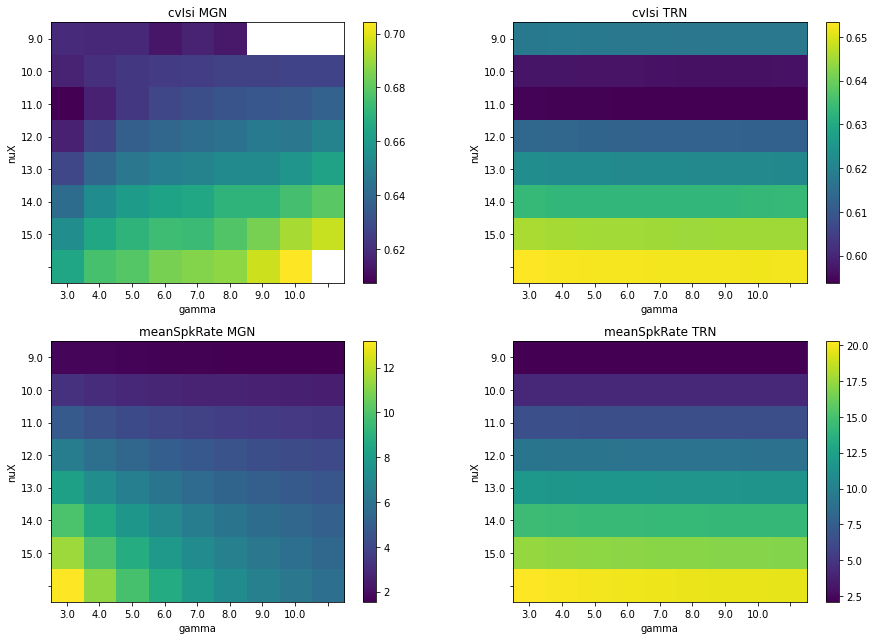

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

makesubplot(df, fig, ax[0], "cvIsi")

makesubplot(df, fig, ax[1], "meanSpkRate")

#pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

In [57]:
#! ls demyelination/data/exp3/activity/

In [77]:
#df[df.brainPart == 'TRN'].shape, df.shape
#df.head()
searchdf = df[((df.brainPart == "MGN") & (df.meanSpkRate > 8.15) & (df.meanSpkRate < 8.25)) | ((df.brainPart == "TRN") & (df.meanSpkRate > 17.15) & (df.meanSpkRate < 17.25))]
searchdf[searchdf.brainPart=='MGN'].sort_values(["exp3_nuX", "gamma", "wMGN", "nuX_stim"])

exp3_nuX  gamma  wMGN  nuX_stim brainPart  meanSpkRate  pearsonCoeff  \
1949      15.0    4.0   2.5      15.0       MGN     8.244683      0.005991   
2773      15.0    4.0   2.5      20.0       MGN     8.243777      0.002598   
30        15.0    4.0   2.5      25.0       MGN     8.223349      0.003945   
1332      15.0    4.0   2.5      30.0       MGN     8.239842      0.000470   
2855      15.0    4.0   2.5      35.0       MGN     8.225364     -0.000339   
663       15.0    4.0   2.5      40.0       MGN     8.239595      0.004786   
3551      15.0    4.0   2.5      50.0       MGN     8.226588      0.006310   
2109      15.0    5.0   2.0      25.0       MGN     8.225280      0.006179   
219       15.0    5.0   2.0      30.0       MGN     8.233103      0.001448   
817       15.0    5.0   2.0      35.0       MGN     8.224470     -0.001408   
43        15.0    5.0   2.0      40.0       MGN     8.224679      0.006220   
167       15.0    5.0   2.0      50.0       MGN     8.211732      0.002862   
2296      15.0   10.0   1.0      15.0       MGN     8.249480      0.001383   
1548      15.0   10.0   1.0      25.0       MGN     8.221982      0.003344   
908       15.0   10.0   1.0      30.0       MGN     8.244718      0.006121   
3287      15.0   10.0   1.0      35.0       MGN     8.211804      0.005101   
530       15.0   10.0   1.0      40.0       MGN     8.231760      0.000682   
1543      15.0   10.0   1.0      50.0       MGN     8.223985      0.002167   

         cvIsi  
1949       NaN  
2773       NaN  
30         NaN  
1332       NaN  
2855       NaN  
663        NaN  
3551  0.711733  
2109       NaN  
219        NaN  
817   0.709512  
43         NaN  
167        NaN  
2296       NaN  
1548       NaN  
908        NaN  
3287       NaN  
530        NaN  
1543       NaN

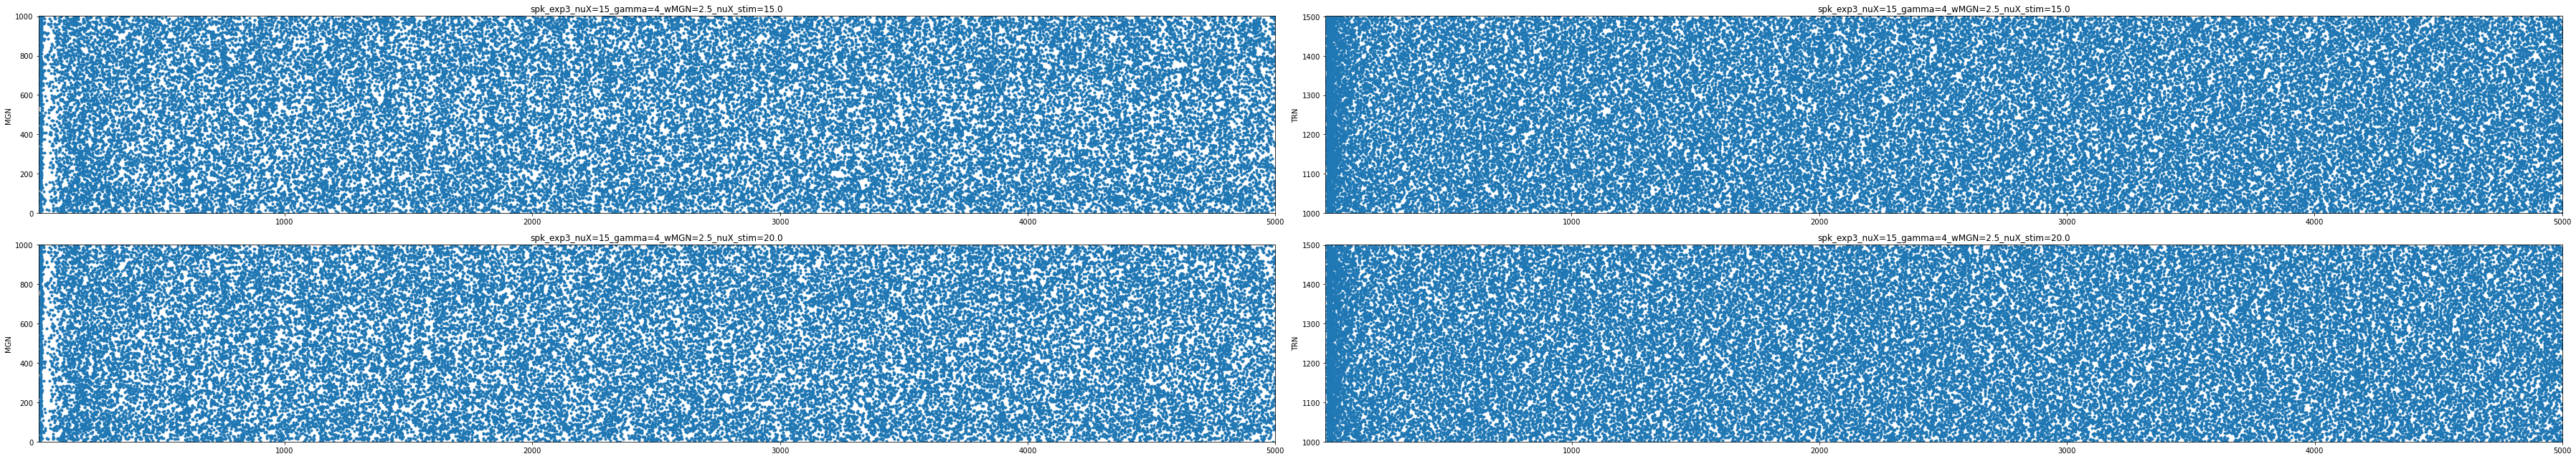

In [75]:
fls = [
    "spk_exp3_nuX=15_gamma=4_wMGN=2.5_nuX_stim=15.0",
    "spk_exp3_nuX=15_gamma=4_wMGN=2.5_nuX_stim=20.0",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp3/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()

## Exp2

In [44]:
files = pipeline.readfiles("demyelination/data/exp2/activity");
df_sim = preparedf(files, 'exp2');

In [45]:
df_sim

gamma  nux  nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
8        2    8  1000       MGN     1.720764      0.002109       NaN
130      2    8   500       MGN     1.865950     -0.001041  0.620675
152      2    8  1000       TRN     6.110610      0.897147  1.859561
274      2    8   500       TRN     6.115123      0.892309  1.865903
58       2    9   500       MGN     3.506504      0.002496  0.613328
..     ...  ...   ...       ...          ...           ...       ...
187     10   14  1000       TRN    22.748844      0.781362  1.178586
116     10   15   500       MGN     8.901396      0.035330  0.820027
127     10   15  1000       MGN     3.880454      0.123539  1.172265
260     10   15   500       TRN    26.236982      0.780742  1.176611
271     10   15  1000       TRN    25.753370      0.783614  1.181465

[288 rows x 7 columns]

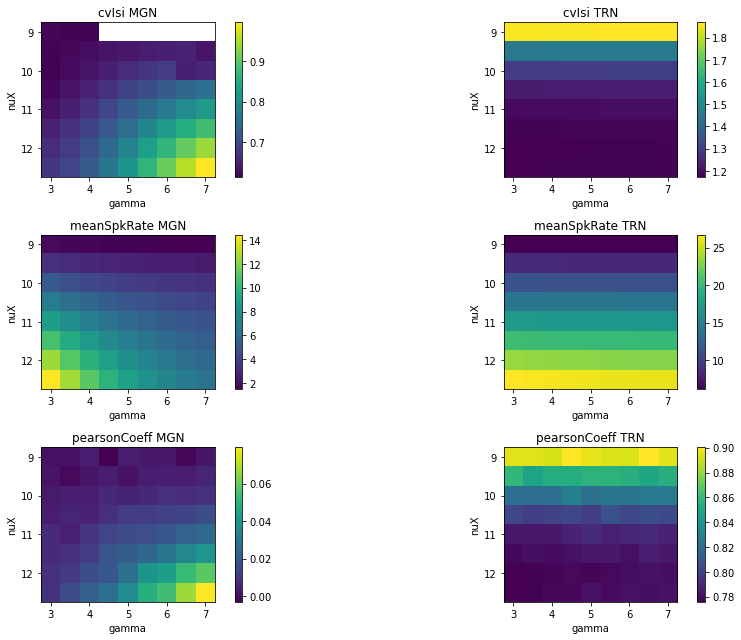

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

pipeline.makesubplot(df, fig, ax[0], "cvIsi")

pipeline.makesubplot(df, fig, ax[1], "meanSpkRate")

pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

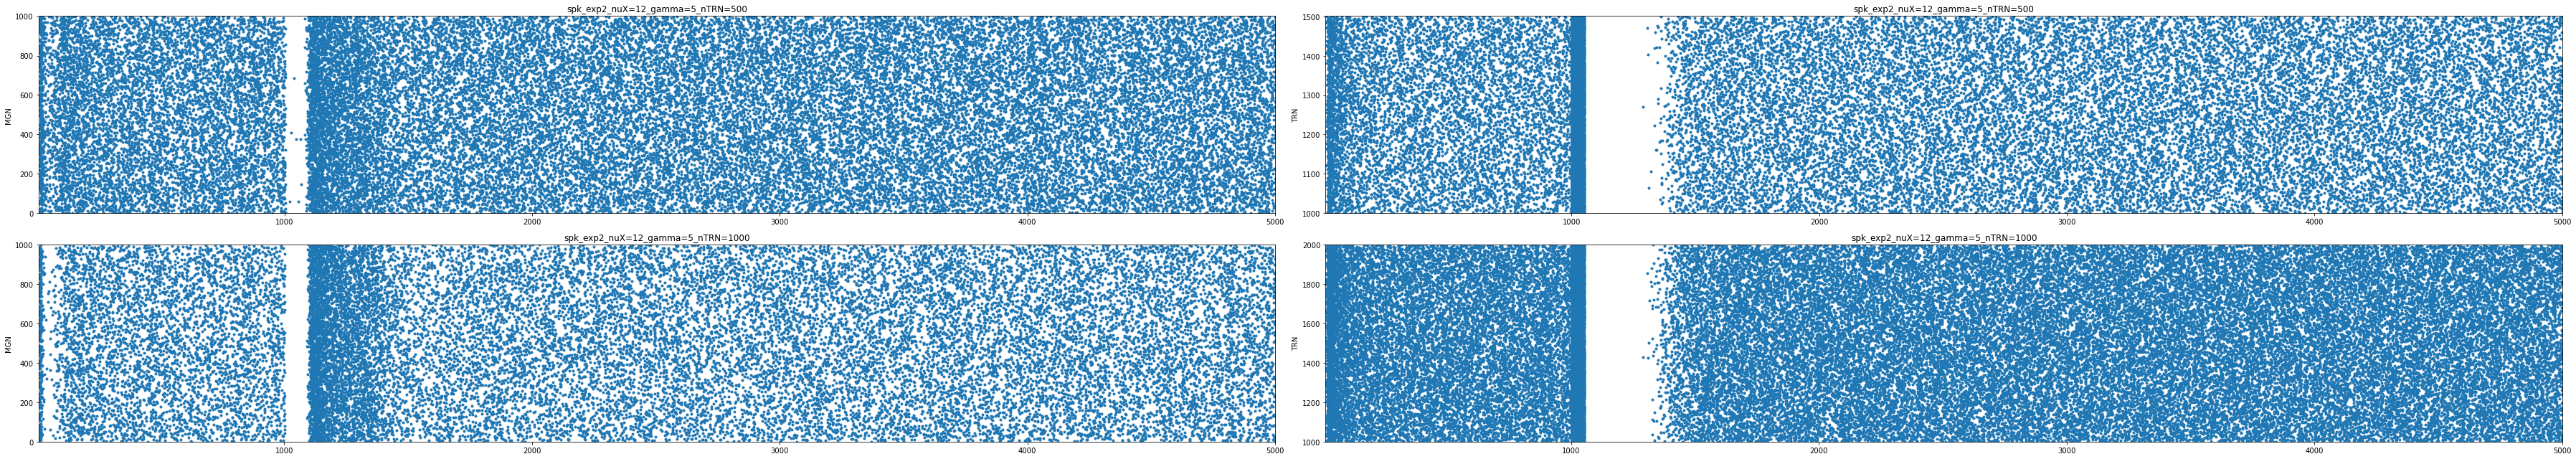

In [46]:
fls = [
    "spk_exp2_nuX=12_gamma=5_nTRN=500",
    "spk_exp2_nuX=12_gamma=5_nTRN=1000",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp2/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()